### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Answer**<br>
Dependent variables are the congruent and incongruent times.<br>
Independent variables are word and color combination of text that is shown to the participants, also the size and type of fonts used.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Answer**<br>
Two tail test is ideal when direction is not important. In this case, the null hypothesis could be that mean congruent time is equal to mean incongruent time. The alternate hypothesis is that the mean congruent time is not equal to incongruent time.


$$H_0: \mu_{congruent} - \mu_{incongruent} = 0$$
$$H_0: \mu_{congruent} - \mu_{incongruent} \neq 0$$

**$\mu_{congruent}$  and  $\mu_{incongruent}$ are population mean.**

** $\alpha$ = 0.05  (threshold of type 1 error)**

Degrees of freedom = 24-1=23

Assumption: Since the same candidate is taking the congruent and incongruent test, I am assuming that the two are related ( the candidate is the same just the test is different).

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#set random seed for reproducibilty
#np.random.seed(42)

In [4]:
#read the data 
df=pd.read_csv('stroopdata.csv')
print(df.head())
print('\n')
print(df.info())

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [7]:
print('Congruent mean: ' +str(df['Congruent'].mean()))
print('Incongruent mean: ' +str(df['Incongruent'].mean()))
obs_diff_mean=df['Congruent'].mean()-df['Incongruent'].mean()
print('Difference between congruent and incongruent mean '+str(obs_diff_mean))

print('\n')
print('Congruent median: ' +str(df.Congruent.median()))
print('Incongruent median: ' +str(df.Incongruent.median()))

print('\n')
print('Congruent variance: ' +str(df.Congruent.var()))
print('Incongruent variance: ' +str(df.Incongruent.var()))


Congruent mean: 14.051125
Incongruent mean: 22.0159166667
Difference between congruent and incongruent mean -7.96479166667


Congruent median: 14.3565
Incongruent median: 21.0175


Congruent variance: 12.6690290707
Incongruent variance: 23.0117570362


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

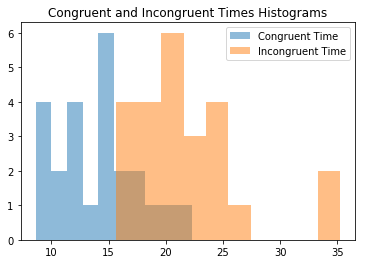

In [17]:
# Build the visualizations here
plt.hist(df.Congruent,alpha=0.5, label='Congruent Time');
plt.hist(df.Incongruent,alpha=0.5,label='Incongruent Time');
plt.legend(loc='upper right')
plt.title('Congruent and Incongruent Times Histograms')
plt.show()

**Observation:**<br>
Congruent times are lower than incongruent times with some overlap i.e. participants took less time in the congruent test than the incongruent test. 

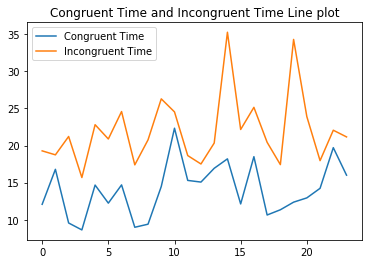

In [12]:
#set the x column as a range of numbers 0-27
x=range(df.shape[0])
x=pd.Series(x)

plt.plot(x,df.Congruent, label='Congruent Time');
plt.plot(x,df.Incongruent, label='Incongruent Time');
plt.legend(loc='upper left')
plt.title('Congruent Time and Incongruent Time Line plot')
plt.show()


**Observation:**<br>
The line plot confirms that each participant spent more time on Incongruent test than on congruent test. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [13]:
import scipy.stats as stats

In [14]:
t_stat, p_val =stats.ttest_rel(df['Congruent'], df['Incongruent'])
#print(t_stat, p_val)
print('t statistic is '+str(t_stat))
print('p value is '+str(p_val))

t statistic is -8.02070694411
p value is 4.10300058571e-08


In [15]:
#lower bound for 95% confidence interval
lower_t_95=stats.t.ppf(q=0.025,  # Quantile to check
            df=23)  # Degrees of freedom

upper_t_95=stats.t.ppf(q=0.975,  # Quantile to check
            df=23)  # Degrees of freedom

print('Confidence interval to accept null hypothesis if \n t statistic is between: ' +str(lower_t_95)+' and '+str(upper_t_95))

Confidence interval to accept null hypothesis if 
 t statistic is between: -2.06865761042 and 2.06865761042


**Observation:**<br>
<br>
Analysing t statistic:<br>
Since the t statistic of -8.021 is outside the acceptable 95% confidence interval of (-2.069, 2.069), we reject the 
null hypothsis. 
<br><br>
Analysing p value:<br>
Also, since p value of 4.103e-08 is less than $\alpha$ of 0.05, we reject the null as well.

Therefore, we can not accept the null hythesis that mean congruent value is equal to mean incongruent value.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**<br>
The brain gets confused becuase what the words mean does not match the color of the words. The two theories stated on this site
https://faculty.washington.edu/chudler/words.html#seffect are :

Speed of Processing Theory: the interference occurs because words are read faster than colors are named. <br>
Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

Similar task that would result in a similar effect: <br>
Turn the words upside down or rotate them 90 degrees.

**Reference**

https://stackoverflow.com/questions/22611446/perform-2-sample-t-test <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html <br>
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html <br>
http://benalexkeen.com/comparative-statistics-in-python-using-scipy/ <br>
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html?view=mosaic <br>
http://www.pythonforfinance.net/2016/04/04/python-skew-kurtosis/<br>
https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions<br>
http://davidmlane.com/hyperstat/A92403.html<br>
https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used <br>
https://stackoverflow.com/questions/36667548/how-to-create-a-series-of-numbers-using-pandas-in-python <br>